<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day04_Feature_Engineering_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
print('Setup complete!')

Setup complete!


Load and Understand the Data

In [ ]:
df = sns.load_dataset("titanic")

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: ")
for col in df.columns:
  print(f" - {col}")

df.head()

Dataset shape: (891, 15)

Columns: 
 - survived
 - pclass
 - sex
 - age
 - sibsp
 - parch
 - fare
 - embarked
 - class
 - who
 - adult_male
 - deck
 - embark_town
 - alive
 - alone


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Data types and missing values
print("Data types & Missing values: ")
print("="*50)

info_df = pd.DataFrame({
    'dtype': df.dtypes,
    'missing_values': df.isnull().sum(),
    'missing_pct': (df.isnull().sum() / len(df) * 100).round(1)
})

print(info_df)

Data types & Missing values: 
                dtype  missing_values  missing_pct
survived        int64               0          0.0
pclass          int64               0          0.0
sex            object               0          0.0
age           float64             177         19.9
sibsp           int64               0          0.0
parch           int64               0          0.0
fare          float64               0          0.0
embarked       object               2          0.2
class        category               0          0.0
who            object               0          0.0
adult_male       bool               0          0.0
deck         category             688         77.2
embark_town    object               2          0.2
alive          object               0          0.0
alone            bool               0          0.0


In [ ]:
#Target variable
print(f"\nTarget: Survived")
print(df['survived'].value_counts())
print(f"\nSurvival rate: {df['survived'].mean():.1%}")


Target: Survived
survived
0    549
1    342
Name: count, dtype: int64

Survival rate: 38.4%


In [ ]:
#Let's look at each column
print("\nColumn Details:")
print("="*50)

for col in df.columns:
  print(f"\n{col}:")
  if df[col].dtype == 'object' or df[col].dtype.name == 'category':
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value: {df[col].unique()[:10]}")
  else:
    print(f" Range: {df[col].min():.2f} - {df[col].max():.2f}")
    print(f" Mean: {df[col].mean():.2f}")


Column Details:

survived:
 Range: 0.00 - 1.00
 Mean: 0.38

pclass:
 Range: 1.00 - 3.00
 Mean: 2.31

sex:
  Unique values: 2
  Value: ['male' 'female']

age:
 Range: 0.42 - 80.00
 Mean: 29.70

sibsp:
 Range: 0.00 - 8.00
 Mean: 0.52

parch:
 Range: 0.00 - 6.00
 Mean: 0.38

fare:
 Range: 0.00 - 512.33
 Mean: 32.20

embarked:
  Unique values: 3
  Value: ['S' 'C' 'Q' nan]

class:
  Unique values: 3
  Value: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

who:
  Unique values: 3
  Value: ['man' 'woman' 'child']

adult_male:
 Range: 0.00 - 1.00
 Mean: 0.60

deck:
  Unique values: 7
  Value: [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

embark_town:
  Unique values: 3
  Value: ['Southampton' 'Cherbourg' 'Queenstown' nan]

alive:
  Unique values: 2
  Value: ['no' 'yes']

alone:
 Range: 0.00 - 1.00
 Mean: 0.60


Handling Missing Values

In [ ]:
"""
Three columns have missing data:

age: 177 missing (19.9%) → Impute
embarked: 2 missing (0.2%) → Impute with mode
deck: 688 missing (77.2%) → Drop column

"""

'\nThree columns have missing data:\n\nage: 177 missing (19.9%) → Impute\nembarked: 2 missing (0.2%) → Impute with mode\ndeck: 688 missing (77.2%) → Drop column\n\n'

In [ ]:
# Create a working copy
df_work = df.copy()

# Drop redundant and high-missing columns
cols_to_drop = ['class', 'embark_town', 'alive', 'deck', 'who', 'adult_male']
df_work = df_work.drop(columns=cols_to_drop)

print(f"Remaining columns: {list(df_work.columns)}")
print(f"\nMissing values:")
print(df_work.isnull().sum()[df_work.isnull().sum() > 0])

Remaining columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'alone']

Missing values:
age         177
embarked      2
dtype: int64


In [ ]:
"""
Stategy 1: Simple Imputation for embarked

"""

print(f"Embarked distribution: ")
print(df_work['embarked'].value_counts())

#fill with the most common
df_work['embarked'].fillna(df_work['embarked'].mode()[0], inplace=True)

print(f"\n Embarked missing after fill: {df_work['embarked'].isnull().sum}")

Embarked distribution: 
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

 Embarked missing after fill: <bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: embarked, Length: 891, dtype: bool>


In [ ]:
"""
Sategy 2: Simple Imputation for age

"""

df_work['age_missing'] = df_work['age'].isnull().astype(int)

print("Survival rate by age missingness: ")
print(df_work.groupby('age_missing')['survived'].mean())

print("\nClass distribution by age missingness: ")
print(pd.crosstab(df_work['age_missing'], df_work['pclass'], normalize='index').round(2))

Survival rate by age missingness: 
age_missing
0    0.406162
1    0.293785
Name: survived, dtype: float64

Class distribution by age missingness: 
pclass          1     2     3
age_missing                  
0            0.26  0.24  0.50
1            0.17  0.06  0.77


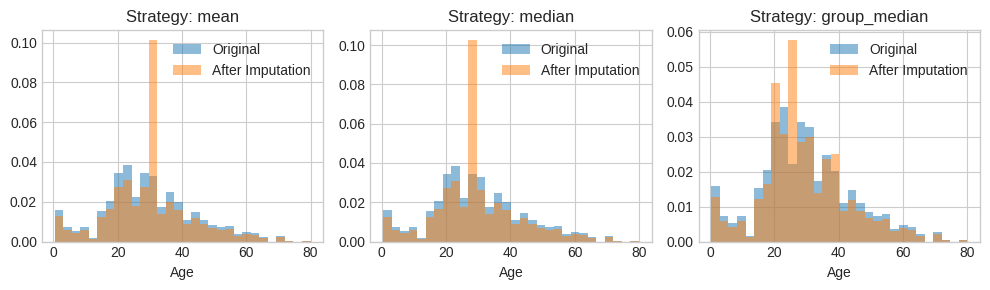

In [ ]:
#compare imputation strategies
def test_imputation_strategy(df, strategy, **kwargs):
  df_test = df.copy()

  if strategy == 'mean':
    df_test['age'].fillna(df_test['age'].mean(), inplace=True)
  elif strategy == 'median':
    df_test['age'].fillna(df_test['age'].median(), inplace=True)
  elif strategy == 'group_median':
    #median by pclass and sex
    df_test['age'] = df_test.groupby(['pclass', 'sex'])['age'].transform(
        lambda x: x.fillna(x.median())
    )
  return df_test['age']

#store original
age_original = df_work['age'].copy()

#Test strategies
strategies = ['mean', 'median', 'group_median']

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, strategy in zip(axes, strategies):
  df_work['age'] = age_original.copy()
  imputed_age = test_imputation_strategy(df_work, strategy)

  ax.hist(age_original.dropna(), bins=30, alpha=0.5, label='Original', density = True)
  ax.hist(imputed_age, bins=30, alpha=0.5, label='After Imputation', density = True)

  ax.set_title(f"Strategy: {strategy}")
  ax.set_xlabel("Age")
  ax.legend()

plt.tight_layout()
plt.show()


Feature Creation

In [ ]:
"""
Feature 1: Family Size

"""

#family size = siblings/spouses + parents/children + self
df_work['family_size'] = df_work['sibsp'] + df_work['parch'] + 1

print("Family Size Distribution: ")
print(df_work['family_size'].value_counts().sort_index())

#survival by family size
survival_by_family = df_work.groupby('family_size')['survived'].agg(['mean', 'count'])
print("\nSurvival by Family Size: ")
print(survival_by_family)


Family Size Distribution: 
family_size
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Survival by Family Size: 
                 mean  count
family_size                 
1            0.303538    537
2            0.552795    161
3            0.578431    102
4            0.724138     29
5            0.200000     15
6            0.136364     22
7            0.333333     12
8            0.000000      6
11           0.000000      7


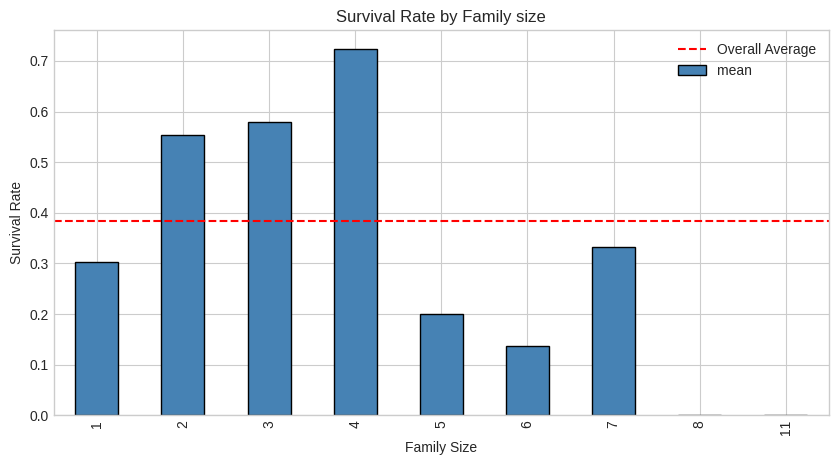

Insight: small families (2-4) had higher survival rates than solo travellers or large families


In [ ]:
#visualize
fig, ax = plt.subplots(figsize=(10, 5))

survival_by_family['mean'].plot(kind='bar', ax=ax,
                                         color='steelblue', edgecolor='black')
ax.set_xlabel('Family Size')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Family size')
ax.axhline(y=df_work['survived'].mean(), color='r', linestyle='--', label='Overall Average')

ax.legend()
plt.show()

print("Insight: small families (2-4) had higher survival rates than solo travellers or large families")

In [ ]:
"""
Feature 2: Is Alone

"""
#Binary: Alone or not
df_work['is_alone'] = (df_work['family_size'] == 1).astype(int)

print("Is Alone Distribution: ")
print(df_work['is_alone'].value_counts())
print(f"\nSurvival rate - Alone: {df_work[df_work['is_alone']==1]['survived'].mean():.1%}")
print(f"Survival rate - With family: {df_work[df_work['is_alone']==0]['survived'].mean():.1%}")

Is Alone Distribution: 
is_alone
1    537
0    354
Name: count, dtype: int64

Survival rate - Alone: 30.4%
Survival rate - With family: 50.6%


In [ ]:
"""
Feature 3: Age Groups

"""

df_work['age_group'] = pd.cut(
    df_work['age'],
    bins=[0, 12, 18,35, 60, 100],
    labels=['child', 'teen', 'adult', 'middle_age', 'senior']
)

print("Age Group Distribution: ")
print(df_work['age_group'].value_counts())

print("\n Survival by Age Group:")
print(df_work.groupby('age_group')['survived'].mean().round(3))

Age Group Distribution: 
age_group
adult         358
middle_age    195
teen           70
child          69
senior         22
Name: count, dtype: int64

 Survival by Age Group:
age_group
child         0.580
teen          0.429
adult         0.383
middle_age    0.400
senior        0.227
Name: survived, dtype: float64


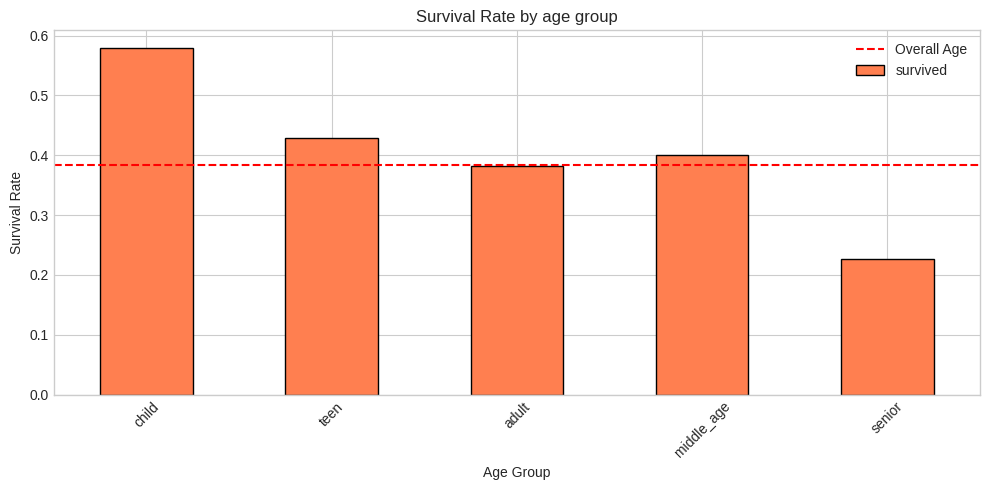

Insight: Children had the highes survival rate (women and children first).


In [ ]:
#visualize
fig, ax = plt.subplots(figsize=(10, 5))

age_survival = df_work.groupby('age_group')['survived'].mean()
age_survival.plot(kind='bar', ax=ax, color='coral', edgecolor='black')
ax.set_xlabel("Age Group")
ax.set_ylabel("Survival Rate")
ax.set_title("Survival Rate by age group")
ax.axhline(y=df_work['survived'].mean(), color='r', linestyle='--',label='Overall Age')
ax.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Insight: Children had the highes survival rate (women and children first).")

In [ ]:
"""
Feature 4: Fare by person

"""
# Fare might be for the whole family
df_work['fare_per_person'] = df_work['fare'] / df_work['family_size']

print(f"Fare per person distribution:")
print(df_work['fare_per_person'].describe())

Fare per person distribution:
count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: fare_per_person, dtype: float64


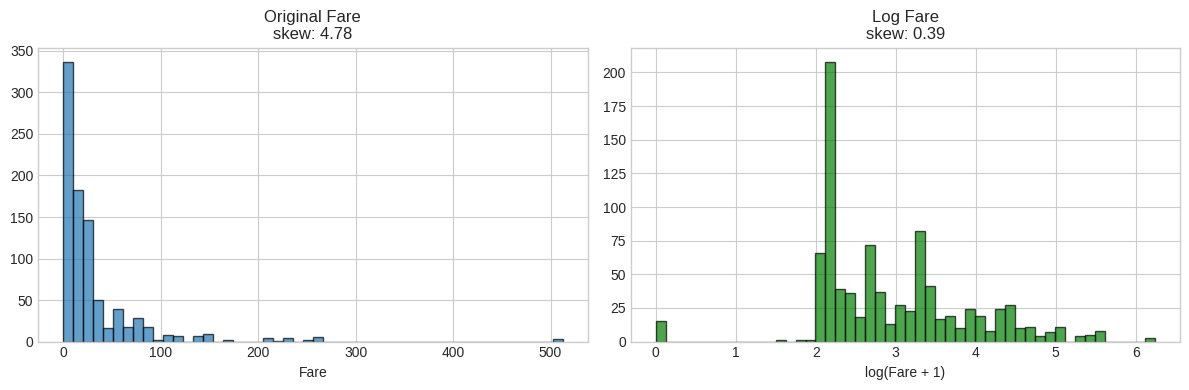

In [ ]:
"""
Feature 5: Log Fare

"""
#Log transform (add 1 to handle zeros)
df_work['fare_log'] = np.log1p(df_work['fare'])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df_work['fare'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title(f"Original Fare\nskew: {stats.skew(df_work['fare']):.2f}")
axes[0].set_xlabel("Fare")

axes[1].hist(df_work['fare_log'], bins=50, edgecolor='black', alpha=0.7, color='g')
axes[1].set_title(f"Log Fare\nskew: {stats.skew(df_work['fare_log']):.2f}")
axes[1].set_xlabel("log(Fare + 1)")

plt.tight_layout()
plt.show()

Encoding Categorical Variables

In [ ]:
#identify categorical columns
print("Categorical columns to encode:")
cat_cols = df_work.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
  print(f"   {col}:  {df_work[col].unique()}")

Categorical columns to encode:
   sex:  ['male' 'female']
   embarked:  ['S' 'C' 'Q']
   age_group:  ['adult', 'middle_age', NaN, 'child', 'teen', 'senior']
Categories (5, object): ['child' < 'teen' < 'adult' < 'middle_age' < 'senior']



### Encoding Strategy:

| Column | Type | Encoding | Reason |
|--------|------|----------|--------|
| sex | Binary | Label (0/1) | Only 2 values |
| embarked | Nominal | One-Hot | No natural order |
| pclass | Ordinal | Keep as-is | Already numeric, has order |
| family_category | Nominal | One-Hot | No natural order |
| age_group | Ordinal | Ordinal Encode | Has natural order |

In [ ]:
# 1. Sex: BInary encoding
df_work['sex_encoded'] = (df_work['sex'] == 'male').astype(int)
print('Sex encoding:')
print(df_work[['sex_encoded', 'sex']].drop_duplicates())

Sex encoding:
   sex_encoded     sex
0            1    male
1            0  female


In [ ]:
# 2. Embarked: One-hot encoding
family_dummies = pd.get_dummies(df_work['embarked'], prefix='embarked')
print('\n Embarked one-hot encoding:')
print(family_dummies.head())

df_work = pd.concat([df_work, family_dummies], axis=1)


 Embarked one-hot encoding:
   embarked_C  embarked_Q  embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


In [ ]:
# 4. Age group: Ordinal encoding
age_order = {'child': 0, 'teen': 1, 'adult': 2, 'middle_age': 3, 'senior': 4}
df_work['age_group_encoded'] = df_work['age_group'].map(age_order)
print('\n Age group encoding:')
print(df_work[['age_group', 'age_group_encoded']].drop_duplicates().sort_values('age_group_encoded'))


 Age group encoding:
     age_group age_group_encoded
7        child                 0
9         teen                 1
0        adult                 2
1   middle_age                 3
33      senior                 4
5          NaN               NaN


In [ ]:
#check current state
print(f"DataFrame shape: {df_work.shape}")
df_work.head()

DataFrame shape: (891, 23)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,age_missing,...,fare_per_person,fare_log,sex_encoded,embarked_C,embarked_Q,embarked_S,embarked_C,embarked_Q,embarked_S,age_group_encoded
0,0,3,male,22.0,1,0,7.2500,S,False,0,...,3.62500,2.110213,1,False,False,True,False,False,True,2
1,1,1,female,38.0,1,0,71.2833,C,False,0,...,35.64165,4.280593,0,True,False,False,True,False,False,3
2,1,3,female,26.0,0,0,7.9250,S,True,0,...,7.92500,2.188856,0,False,False,True,False,False,True,2
3,1,1,female,35.0,1,0,53.1000,S,False,0,...,26.55000,3.990834,0,False,False,True,False,False,True,2
4,0,3,male,35.0,0,0,8.0500,S,True,0,...,8.05000,2.202765,1,False,False,True,False,False,True,2


Feature Scaling

In [ ]:
# Numeric columns to scale
numeric_cols = ['age', 'fare', 'fare_log', 'fare_per_person', 'family_size']

print("Before scaling:")
print(df_work[numeric_cols].describe().round(2))

Before scaling:
          age    fare  fare_log  fare_per_person  family_size
count  714.00  891.00    891.00           891.00       891.00
mean    29.70   32.20      2.96            19.92         1.90
std     14.53   49.69      0.97            35.84         1.61
min      0.42    0.00      0.00             0.00         1.00
25%     20.12    7.91      2.19             7.25         1.00
50%     28.00   14.45      2.74             8.30         1.00
75%     38.00   31.00      3.47            23.67         2.00
max     80.00  512.33      6.24           512.33        11.00


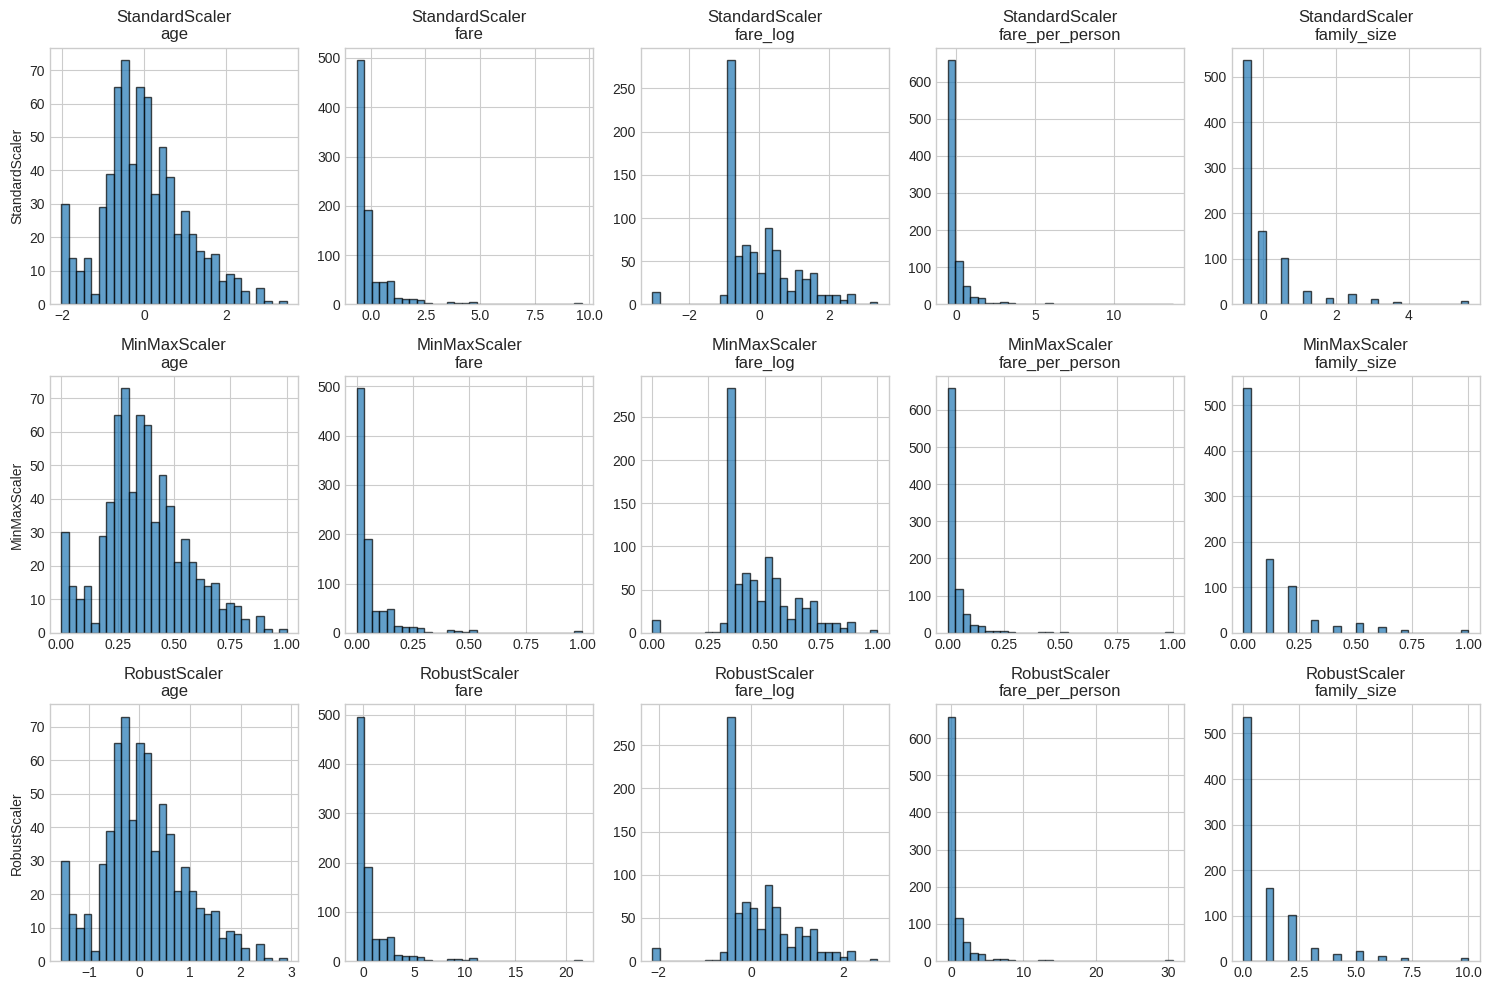

In [ ]:
# compare 3 scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(3, len(numeric_cols), figsize=(15, 10))

for i, (scaler_name, scaler) in enumerate(scalers.items()):
  scaled_data = scaler.fit_transform(df_work[numeric_cols])
  scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

  for j, col in enumerate(numeric_cols):
    axes[i, j].hist(scaled_df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i, j].set_title(f'{scaler_name}\n{col}')
    if j == 0:
      axes[i, j].set_ylabel(scaler_name)

plt.tight_layout()
plt.show()



### Scaler Comparison

| Scaler | Formula | Best When |
|--------|---------|----------|
| **StandardScaler** | (x - mean) / std | Data is roughly normal |
| **MinMaxScaler** | (x - min) / (max - min) | Need bounded [0, 1] range |
| **RobustScaler** | (x - median) / IQR | Data has outliers |

For Titanic, `fare` has outliers, so **RobustScaler** might be better.

Building the final feature set

In [ ]:
#select final features for modelling
feature_cols = [
    #original numeric
    'pclass', 'age', 'fare_log', 'family_size',

    #encoded categorical
    'sex_encoded', 'embarked_C', 'embarked_Q', 'embarked_S',

    #derived
    'is_alone', 'age_group_encoded'
]

#target
target_col = 'survived'

#create x and y
x = df_work[feature_cols].copy()
y = df_work[target_col].copy()

print(f"features: {x.shape[1]}")
print(f"Rows: {x.shape[0]}")

for col in feature_cols:
  print(f"  - {col}")

features: 13
Rows: 891
  - pclass
  - age
  - fare_log
  - family_size
  - sex_encoded
  - embarked_C
  - embarked_Q
  - embarked_S
  - is_alone
  - age_group_encoded


In [ ]:
#checking for any issues
print("Missing values:")
print(x.isnull().sum())

print("\n Data Types")
print(x.dtypes)

Missing values:
pclass                 0
age                  177
fare_log               0
family_size            0
sex_encoded            0
embarked_C             0
embarked_C             0
embarked_Q             0
embarked_Q             0
embarked_S             0
embarked_S             0
is_alone               0
age_group_encoded    177
dtype: int64

 Data Types
pclass                  int64
age                   float64
fare_log              float64
family_size             int64
sex_encoded             int64
embarked_C               bool
embarked_C               bool
embarked_Q               bool
embarked_Q               bool
embarked_S               bool
embarked_S               bool
is_alone                int64
age_group_encoded    category
dtype: object


In [ ]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {x_train.shape[0]} samples")
print(f"Test set: {x_test.shape[0]} samples")
print(f"\nTarget distribution in train: {y_train.mean():.1%} survived")
print(f"Target distribution in test: {y_test.mean():.1%} survived")

Training set: 712 samples
Test set: 179 samples

Target distribution in train: 38.3% survived
Target distribution in test: 38.5% survived


Building Sklearn Pipeline

In [ ]:
#Scaling features and model in one pipeline
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Added imputer for missing values
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

#fit
pipeline_lr.fit(x_train, y_train)

#predict
y_pred = pipeline_lr.predict(x_test)

#evaluate
print("Logistic Regression Results:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))

Logistic Regression Results:
Accuracy: 0.804

Classification Report:
              precision    recall  f1-score   support

        Died       0.83      0.86      0.84       110
    Survived       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# Try Random Forest (doesn't need scaling, but let's include for consistency)

pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_rf.fit(x_train, y_train)
y_pred_rf = pipeline_rf.predict(x_test)

print("Random Forest Results:")
print('='*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Died', 'Survived']))


Random Forest Results:
Accuracy: 0.782

Classification Report:
              precision    recall  f1-score   support

        Died       0.82      0.83      0.82       110
    Survived       0.72      0.71      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
#Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score

print("Cross-Validation Results (5-fold): ")
print('='*50)

cv_scores_lr = cross_val_score(pipeline_lr, x, y, cv=5, scoring='accuracy')
print(f"Logistic Regression: {cv_scores_lr.mean():.3f} (+/- {cv_scores_lr.std()*2:.3f})")

cv_scores_rf = cross_val_score(pipeline_rf, x, y, cv=5, scoring='accuracy')
print(f"Random Forest: {cv_scores_rf.mean():.3f} (+/- {cv_scores_rf.std()*2:.3f})")

Cross-Validation Results (5-fold): 
Logistic Regression: 0.791 (+/- 0.041)
Random Forest: 0.807 (+/- 0.066)


Feature Importance Analysis

In [ ]:
importances = pipeline_rf.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({
    'feature': x.columns.tolist(), # Use x.columns to get the actual feature names
    'importance': importances
}).sort_values('importance', ascending=False)

print("Feature Importance (Random forest):")
print(importance_df.to_string(index=False))

Feature Importance (Random forest):
          feature  importance
         fare_log    0.266299
      sex_encoded    0.255927
              age    0.216338
           pclass    0.085081
      family_size    0.064986
age_group_encoded    0.054082
         is_alone    0.016726
       embarked_C    0.009026
       embarked_S    0.008956
       embarked_S    0.008821
       embarked_C    0.007175
       embarked_Q    0.003459
       embarked_Q    0.003126


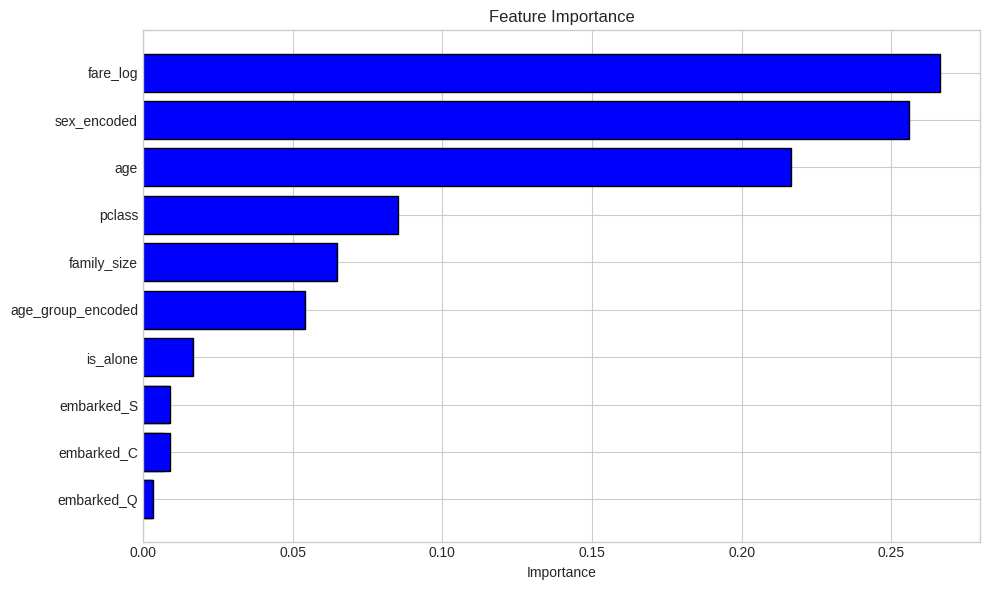


Insights:
- sex_encoded is the most important feature (women survived more)
- fare_log shows economic status mattered
- age and pclass also important


In [ ]:
#Visualize
fig, ax = plt.subplots(figsize=(10, 6))
importance_df_sorted = importance_df.sort_values('importance', ascending=True)
ax.barh(importance_df_sorted['feature'],
        importance_df_sorted['importance'], # Add 'width' argument here
        color='b', edgecolor='black')
ax.set_xlabel("Importance")
ax.set_title("Feature Importance")
plt.tight_layout()
plt.show()

print("\nInsights:")
print("- sex_encoded is the most important feature (women survived more)")
print("- fare_log shows economic status mattered")
print("- age and pclass also important")

In [ ]:
#logistic regression coefficients
coef_df = pd.DataFrame({
    'feature': x.columns.tolist(), # Use x.columns to get the actual feature names
    'coefficient': pipeline_lr.named_steps['model'].coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\nInterpretation")
print(coef_df.to_string(index=False))
print("- Positive coefficients = increases survival probability")
print("- Negaive coefficients = decreses survival probability")


Interpretation
          feature  coefficient
      sex_encoded    -2.498337
           pclass    -0.850278
         fare_log     0.481780
         is_alone    -0.462208
age_group_encoded    -0.407816
      family_size    -0.375822
              age    -0.187894
       embarked_Q     0.175114
       embarked_Q     0.175114
       embarked_S    -0.146386
       embarked_S    -0.146386
       embarked_C    -0.028728
       embarked_C    -0.028728
- Positive coefficients = increases survival probability
- Negaive coefficients = decreses survival probability


Confusion Matrix

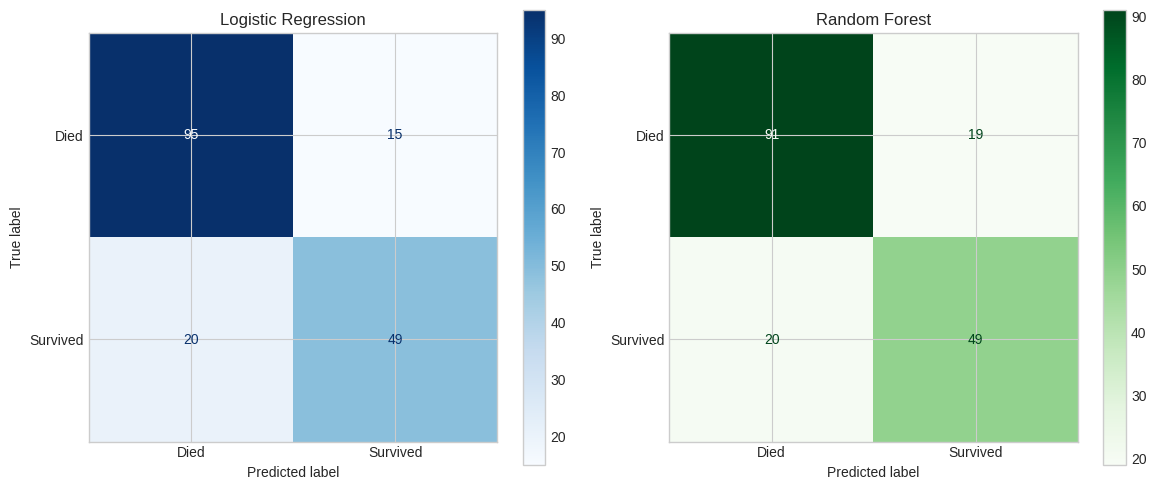

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Died', 'Survived'], ax=axes[0], cmap='Blues'
)
axes[0].set_title("Logistic Regression")

# Random Forest
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, display_labels=['Died', 'Survived'], ax=axes[1], cmap='Greens'
)
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

#%% md
---
## Summary: What We Built Today

### Feature Engineering Steps:

| Step | What We Did | Why |
|------|-------------|-----|
| **1. Missing Values** | Mode for embarked, group median for age | Preserve distributions |
| **2. Feature Creation** | family_size, is_alone, age_group, fare_log | Capture domain knowledge |
| **3. Encoding** | Label for binary, one-hot for nominal | Models need numbers |
| **4. Scaling** | StandardScaler | Normalize ranges |
| **5. Pipeline** | sklearn Pipeline | Reproducibility |

### Features Created:

| Feature | Source | Type |
|---------|--------|------|
| family_size | sibsp + parch + 1 | Numeric |
| is_alone | family_size == 1 | Binary |
| fare_log | log(fare + 1) | Numeric |
| age_group | binned age | Ordinal |
| sex_encoded | sex == male | Binary |
| embarked_* | one-hot embarked | Binary |

### Results:

- Logistic Regression: ~80% accuracy
- Random Forest: ~80% accuracy
- Most important features: sex, fare, pclass, age

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path = '/content/drive/MyDrive/100-days-of-ml/phase-1-data-foundations/day-04-Feature-engineering-Pipeline'
os.makedirs(path, exist_ok=True)
print(f'Created: {path}')

Created: /content/drive/MyDrive/100-days-of-ml/phase-1-data-foundations/day-04-Feature-engineering-Pipeline
